In [46]:
import requests
from bs4 import BeautifulSoup

new = [] #紀錄最新價錢 個別存放momo、yahoo、pchome三個平台的價格
header = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36"}

#=========用bs4爬取momo===============
url = "https://www.momoshop.com.tw/goods/GoodsDetail.jsp?i_code=11421605&Area=search&mdiv=403&oid=1_1&cid=index&kw=RAS-50NT"
momo = requests.get(url, headers = header)
#print(r.status_code) 

soup = BeautifulSoup(momo.text, "html.parser")

price_momo = soup.find("span",{"class":"seoPrice"}).text
price_momo = price_momo.replace(",","")
new.append(int(price_momo))
print(price_momo) # 印出抓到的價錢

54551


In [47]:
#=========用bs4爬取yahoo===============
url = "https://tw.buy.yahoo.com/gdsale/HITACHI%E6%97%A5%E7%AB%8B8-5%E5%9D%AA-1%E7%B4%9A%E8%AE%8A%E9%A0%BB%E5%86%B7%E6%9A%96%E5%86%B7%E6%B0%A3-RAC-50NP-RAS-50NT-%E5%B0%8A%E6%A6%AER32%E5%86%B7%E5%AA%92-9855152.html"
yahoo = requests.get(url,headers = header)
soup = BeautifulSoup(yahoo.text, "html.parser")
price_yahoo = soup.find("div",{"class":"HeroInfo__mainPrice___1xP9H"}).text
price_yahoo = price_yahoo.replace("$","")
price_yahoo = price_yahoo.replace(",","")
new.append(int(price_yahoo))
print(price_yahoo) # 印出抓到的價錢

54552


In [48]:
#=========用selenium爬取pchome===============
from selenium import webdriver
from selenium.webdriver.common.by import By
import os

# 將驅動程序的路徑添加到系統路徑中
chrome_driver_path = 'C:/Users/小胖/Desktopchromedriver.exe'
os.environ["PATH"]+= os.pathsep + chrome_driver_path

browser = webdriver.Chrome()
url = "https://24h.pchome.com.tw/prod/DPAFA2-A900E038D"
browser.get(url)
prodPrice = browser.find_elements(By.CLASS_NAME, "o-prodPrice__price")

for price_pc in prodPrice:
    #print(price_pc.text)
    price_pc = price_pc.text
    price_pc = price_pc.replace("$","")
    price_pc = price_pc.replace(",","")
new.append(int(price_pc))
print(price_pc) #印出抓到的價錢
browser.quit()

55791


In [49]:
print(new) #印出三個平台的價錢

[54551, 54552, 55791]


In [50]:
# 取得執行時間
from datetime import datetime
currentDateAndTime = datetime.now()
currentTime = currentDateAndTime.strftime("%Y-%m-%d %H:%M:%S")
print(currentTime)
new.insert(0,currentTime) #['2023-06-10 23:19:06', 65160, 55350, 70760]
print(new) # 完整的一筆資料(date,momo,yahoo,pchome)

2023-06-13 12:25:29
['2023-06-13 12:25:29', 54551, 54552, 55791]


In [51]:
# ========= 建立excel工作簿 注意:此步驟執行過一次即可!=============
'''
import openpyxl
nwb = openpyxl.Workbook()
nwb.create_sheet("price_tk", 0) 
price_tk = nwb.worksheets[0] #將工作表名稱取為price_tk，並插入title
price_tk.append(["time","momo","yahoo","pchome","momo與前一天的價差","yahoo與前一天的價差","pchome與前一天的價差"])
nwb.save("track.xlsx")
'''

''

In [54]:
# ========= 再次load 已建立好的工作簿 ============================
import openpyxl
wb_tracking = openpyxl.load_workbook("track.xlsx") 
price_tk = wb_tracking.worksheets[0]

# ========= 新增資料 & 計算價錢變化 ============================
if price_tk.cell(row=2,column=1).value == None: #如果還沒有第一筆資料就新增
    for i in range(len(new)):
        price_tk.cell(row=2,column=i+1).value = new[i]

else: #如果已經有資料就向下插入一筆新的資料，然後計算價錢變化
    price_tk.append(new)
    change_momo = price_tk.cell(row=price_tk.max_row,column=2).value - price_tk.cell(row=price_tk.max_row-1,column=2).value
    price_tk.cell(row=price_tk.max_row,column=5).value = change_momo 
    print("momo今日價與昨日價價差為:",change_momo,"元")

    change_yahoo = price_tk.cell(row=price_tk.max_row,column=3).value - price_tk.cell(row=price_tk.max_row-1,column=3).value
    price_tk.cell(row=price_tk.max_row,column=6).value = change_yahoo 
    print("yahoo今日價與昨日價價差為:",change_yahoo,"元")

    change_pchome = price_tk.cell(row=price_tk.max_row,column=4).value - price_tk.cell(row=price_tk.max_row-1,column=4).value
    price_tk.cell(row=price_tk.max_row,column=7).value = change_pchome
    print("pchome今日價與昨日價價差為:",change_pchome,"元")

wb_tracking.save("track.xlsx")

momo今日價與昨日價價差為: 0 元
yahoo今日價與昨日價價差為: 0 元
pchome今日價與昨日價價差為: 0 元


In [55]:
# ============資料視覺化===========

import matplotlib.pyplot as plt

wb = openpyxl.load_workbook("track.xlsx") 
ws = wb.worksheets[0] 

x = [] #紀錄共經過幾天
date = ws.max_row-1 #-1:去掉title
print(date) #目前有幾筆資料
for i in range(date):
    x.append(i+1)
print(x)

2
[1, 2]


In [56]:
momo = [] #y軸:存放momo每日的價錢
yahoo = []
pchome = []
for i in range(ws.max_row):
    momo.append(ws.cell(row=i+1,column=2).value)
    yahoo.append(ws.cell(row=i+1,column=3).value)
    pchome.append(ws.cell(row=i+1,column=4).value)

momo = momo[1:] #把title拿掉
yahoo = yahoo[1:]
pchome = pchome[1:]
print(momo) 
print(yahoo)
print(pchome)

[54551, 54551]
[54552, 54552]
[55791, 55791]


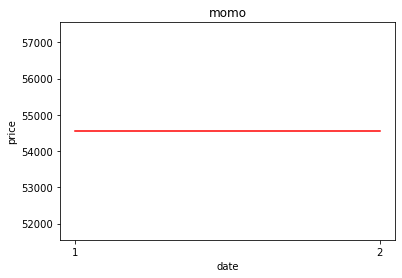

In [57]:
# 繪製圖表:momo
plt.plot(x, momo, color='red')
plt.xlabel('date') # 設定 x 軸標題
plt.ylabel('price') # 設定 y 軸標題
plt.title('momo')
ax = plt.gca() # 把天數去掉小數
ax.get_xaxis().set_major_locator(plt.MaxNLocator(integer=True))
plt.show()

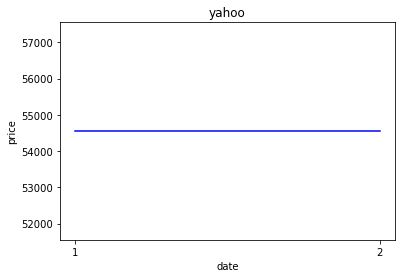

In [58]:
plt.plot(x, yahoo, color='blue')
plt.title('yahoo')
plt.xlabel('date') # 設定 x 軸標題
plt.ylabel('price') # 設定 y 軸標題

ax = plt.gca() # 把天數去掉小數
ax.get_xaxis().set_major_locator(plt.MaxNLocator(integer=True))
plt.show()

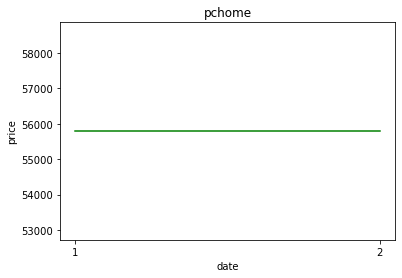

In [59]:
plt.plot(x, pchome, color='green')
plt.xlabel('date') # 設定 x 軸標題
plt.ylabel('price') # 設定 y 軸標題
plt.title('pchome')
ax = plt.gca() # 把天數去掉小數
ax.get_xaxis().set_major_locator(plt.MaxNLocator(integer=True))
plt.show()